In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

In [2]:
from api_key import api_key
#np.random.seed(2)

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.replace(" ", "%20"))

# Print the city count to confirm sufficient count
print(len(cities))



775


In [5]:
url = "api.openweathermap.org/data/2.5/weather?q="
city_list=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
long=[]
country = []
date=[]

for city in cities:
    full_url = "http://" + url + city + "&units=imperial&appid=" + api_key
    weather_data = requests.get(full_url).json()
    try:
        weather_dict = weather_data['main']    
        wind_dict = weather_data['wind']
        cloud_dict = weather_data['clouds']
        lat_long_dict = weather_data['coord']
        country_dict=weather_data['sys']
        temp.append(weather_dict['temp_max'])
        city_list.append(city.replace("%20", ' '))
        humidity.append(weather_dict['humidity'])
        cloudiness.append(cloud_dict['all'])
        wind_speed.append(wind_dict['speed'])
        lat.append(lat_long_dict['lat'])
        long.append(lat_long_dict['lon'])
        country.append(country_dict['country'])
        date.append(weather_data['dt'])
     
    except KeyError:
        cities.remove(city)





In [6]:
city_data = pd.DataFrame({'City': city_list,
                           'Latitude': lat,
                          'Longitude': long,
                          'Max_temp': temp,
                          'Humidity': humidity,
                          'Clouds': cloudiness,
                          'Wind_speed': wind_speed,
                          'Country': country,
                          'Date': date})

city_data.head()

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date
0,bengkulu,-3.8004,102.2655,78.93,77,63,5.19,ID,1612226313
1,kapaa,22.0752,-159.3190,75.20,83,20,16.11,US,1612226313
2,lorengau,-2.0226,147.2712,83.08,77,100,11.48,PG,1612226313
3,severo-kurilsk,50.6789,156.1250,19.78,89,100,5.66,RU,1612226313
4,salekhard,66.5300,66.6019,11.16,96,100,7.63,RU,1612226265


In [7]:
city_data.to_csv('city_data.csv')

In [8]:
high_humidity = city_data.loc[city_data['Humidity']>100]
high_humidity

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date


# Scatter plots

In [41]:
todays_date = date.today()
date_run=todays_date.strftime('%m/%d/%y')
date_run

'02/01/21'

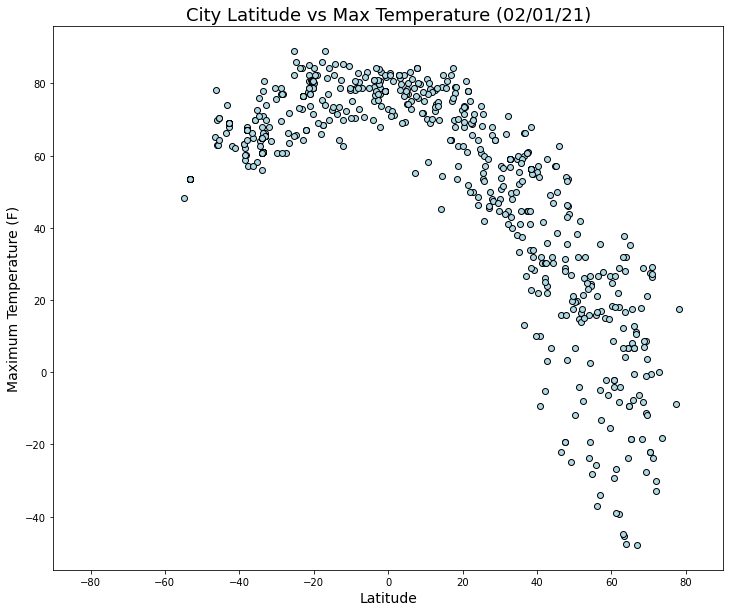

In [42]:
x_axis = city_data['Latitude']
y_axis = city_data['Max_temp']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Maximum Temperature (F)", fontsize=14)
plt.title("City Latitude vs Max Temperature (" + date_run + ')', fontsize=18)
plt.show()

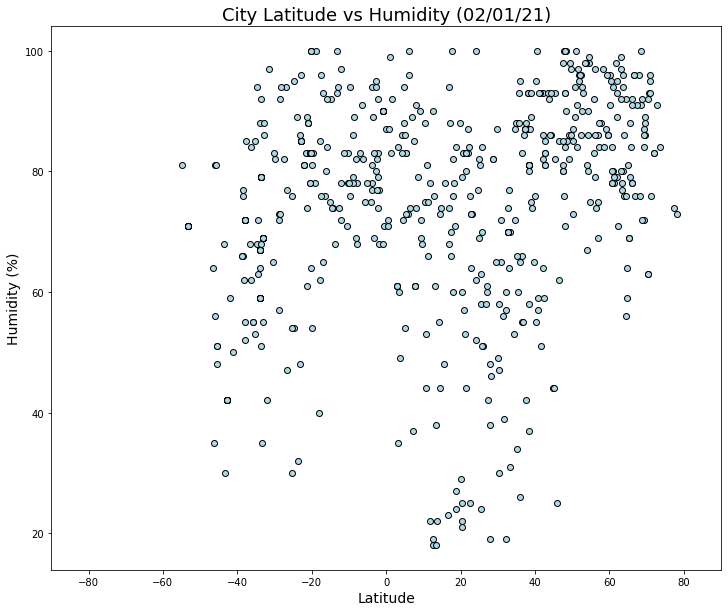

In [43]:
x_axis = city_data['Latitude']
y_axis = city_data['Humidity']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs Humidity (" + date_run + ')', fontsize=18)
plt.show()

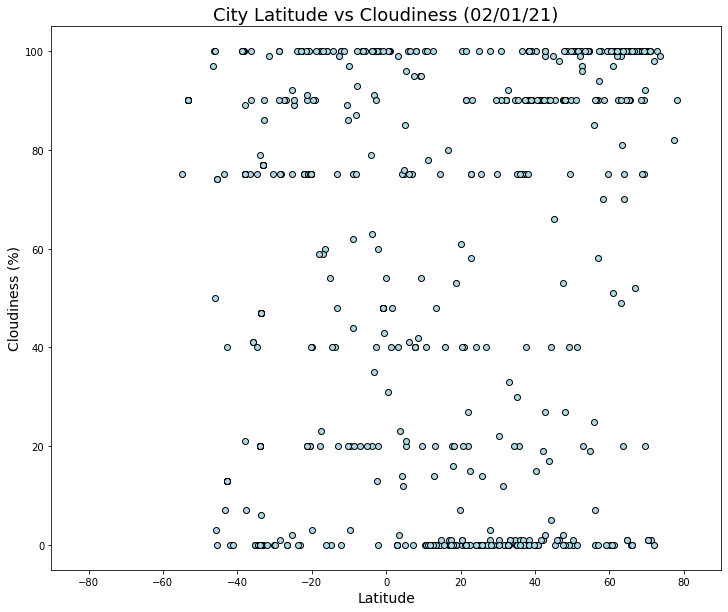

In [44]:
x_axis = city_data['Latitude']
y_axis = city_data['Clouds']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs Cloudiness (" + date_run + ')', fontsize=18)
plt.show()

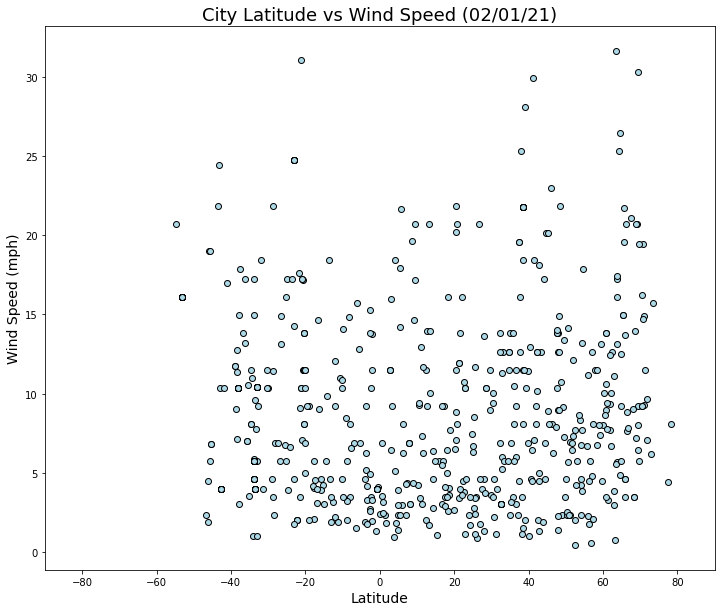

In [45]:
x_axis = city_data['Latitude']
y_axis = city_data['Wind_speed']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("City Latitude vs Wind Speed (" + date_run + ')', fontsize=18)
plt.show()